
# Day 12 AoC

🕎 [Day 12 description](https://adventofcode.com/2022/day/11) 🕎


## Setup

In [1]:
# imports
import os, re, sys, IPython, itertools, operator, functools, datetime, heapq

starttime = datetime.datetime.now()

In [2]:
# common helper, data import
def ans(val):
    return IPython.display.Markdown("**Answer: {}**".format(val))

data_fd = open('inputs/input-aoc-22-12.txt', 'r')
data = data_fd.read().strip().split('\n')

In [3]:


class Land(object):
    def __init__(self, charel, coord, lmap):
        self.is_start = False
        self.is_end = False
        self.distance = None
        self._charel = charel
        if charel == 'S':
            self.el = ord('a')
            self.is_start = True
            self.distance = 0
        elif charel == 'E':
            self.el = ord('z')
            self.is_end = True
        else:
            self.el = ord(charel)
        self._steps = None
        self._links = []
        self._coord = coord
        self._lmap = lmap
        
        
    def coord(self):
        return self._coord
        
    def linkup(self):
        adj_land = self._lmap.adj(self)
        for land in adj_land:
            if land.el - self.el <= 1:
                self._links.append(land)
    def links(self):
        return self._links[:]
        
    def __lt__(self, other):
        return self.distance < other.distance
        
class LandMap(object):
    def __init__(self, data):
        self._data = data
        self.start = None
        self.end = None
        self._size = (len(data), len(data[0]))
        self._land = [[None]*self._size[1] for i in range(self._size[0])]
        self._populate()

    def _populate(self):
        for i in range(self._size[0]):
            for j in range(self._size[1]):
                self._land[i][j] = Land(self._data[i][j], (i,j), self)
                
        for l in self._land:
            for land in l:
                land.linkup()
                if land.is_start:
                    self.start = land
                if land.is_end:
                    self.end = land
        
    def adj(self, land):
        inmapcoord = lambda c: c[0] >= 0 and c[1] >= 0 and c[0] < self._size[0] and c[1] < self._size[1]
        lc = land.coord()
        coords = [ (lc[0]+1, lc[1]), (lc[0]-1, lc[1]), (lc[0], lc[1]+1), (lc[0], lc[1]-1) ]
        return [ self.find(x) for x in coords if inmapcoord(x) ]
    
    def find(self, coord):
        return self._land[coord[0]][coord[1]]
    
    def print(self, key=None):
        lines = []
        for l in self._land:
            lines.append("|".join([str(x.distance) for x in l]))
        print("\n".join(lines))
        
    def print_adj(self):
        lines = []
        for i in range(self._size[0]):
            line = ""
            for j in range(self._size[1]):
                land = self.find((i,j))
                if land in self._foundset:
                    line = line + "$"
                else:
                    line = line + land._charel
                if j+1 < self._size[1]:
                    if self.find((i,j+1)) in land.links():
                        line = line+"#"
                    else:
                        line = line+"|"
            lines.append(line)
            if i+1 < self._size[0]:
                line2 = ""
                for j in range(self._size[1]):
                    land = self.find((i,j))
                    if self.find((i+1, j)) in land.links():
                        line2 = line2 + "# "
                    else:
                        line2 = line2 + "- "
                lines.append(line2)
        print("\n".join(lines))
        
    def calc_distance(self):
        count = 0
        for l in self._land:
            for land in l:
                land.distance = None
                count+=1
        self.start.distance = 0
        done = set()
        done.add(self.start)
        #print("{} of {} done".format(len(done), count))
        work = []
        new_links = self.start.links()
        for l in new_links:
            l.distance = 1
        #work.extend(new_links)
        for l in new_links:
            heapq.heappush(work, l)
        while len(work):
            #work.sort(key=lambda x:x.distance,reverse=True)
            #land = work.pop()
            land = heapq.heappop(work)
            if land in done:
                continue
            new_links = land.links()
            done.add(land)
            #print("{} of {} done".format(len(done), count))
            for l in new_links:
                if l in done:
                    continue
                l.distance = land.distance+1
                heapq.heappush(work, l)
                #work.append(l)
        self._foundset = done

                
        

## Part 1

In [4]:
lmap = LandMap(data)

In [5]:
lmap.calc_distance()

In [6]:
ans(lmap.end.distance)

**Answer: 408**

## Part 2

In [7]:
alands = []
for l in lmap._land:
    for land in l:
        if land._charel == 'a' or land._charel == 'S':
            alands.append(land)


In [8]:
mina = 409
for land in alands:
    lmap.start = land
    lmap.calc_distance()
    if lmap.end.distance and lmap.end.distance < mina:
        mina = lmap.end.distance
ans(mina)

**Answer: 399**

In [9]:
endtime = datetime.datetime.now()

print(endtime - starttime)

0:00:02.406477


## Visualization

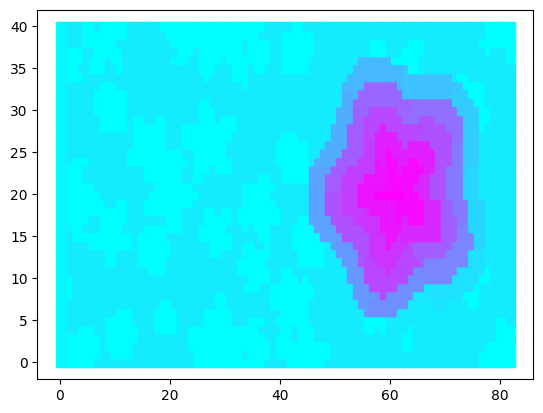

In [10]:
import matplotlib
import matplotlib.pyplot
import numpy
import itertools
matplotlib.colors.Normalize(vmin=0, vmax=26)
coords = []
for i in range(lmap._size[0]):
    for j in range(lmap._size[1]):
        coords.append((i,j))
xvals = [ v[1] for v in coords]
yvals = [ v[0] for v in coords]
fig,ax = matplotlib.pyplot.subplots()
ax.scatter(xvals, yvals, marker='s', 
           c=[lmap.find((y,x)).el-ord('a') for x,y in itertools.zip_longest(xvals, yvals)], 
           cmap=matplotlib.cm.cool)
fig.show()

## Notes


Reading comprehension! I didn't process the note:

```(This also means that the elevation of the destination square can be much lower than the elevation of your current square.)```

So, I assumed you could only go up or down a single value.

The right way to do part 2 is all-points shortest path from E with links reversed, but just iterating through all of them was easy with the implementation of part 1